In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv("/content/hotel_bookings.csv")

In [ ]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

Now I converted all possible columns into the numerical type

In [ ]:
data['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['hotel'] = labelencoder.fit_transform(data['hotel'])
data['hotel'].value_counts()

0    79330
1    40060
Name: hotel, dtype: int64

In [ ]:
data['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [ ]:
data.arrival_date_month.replace(['January','February','March','April','May','June','July','August','September','October','November','December'],
                                [1,2,3,4,5,6,7,8,9,10,11,12],inplace=True)

In [ ]:
data['arrival_date_month'].value_counts()

8     13877
7     12661
5     11791
10    11160
4     11089
6     10939
9     10508
3      9794
2      8068
11     6794
12     6780
1      5929
Name: arrival_date_month, dtype: int64

In [ ]:
data['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [ ]:
data['meal'] = labelencoder.fit_transform(data['meal'])
data['meal'].value_counts()

0    92310
2    14463
3    10650
4     1169
1      798
Name: meal, dtype: int64

In [ ]:
data['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [ ]:
data['country'] = labelencoder.fit_transform(data['country'])
data['country'].value_counts()

135    48590
59     12129
56     10415
51      8568
43      7287
       ...  
44         1
27         1
70         1
172        1
119        1
Name: country, Length: 178, dtype: int64

In [ ]:
data['market_segment'] = labelencoder.fit_transform(data['market_segment'])
data['market_segment'].value_counts()

6    56477
5    24219
4    19811
3    12606
2     5295
1      743
0      237
7        2
Name: market_segment, dtype: int64

In [ ]:
data['distribution_channel'].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [ ]:
data['distribution_channel'] = labelencoder.fit_transform(data['distribution_channel'])
data['distribution_channel'].value_counts().sort_index()

0     6677
1    14645
2      193
3    97870
4        5
Name: distribution_channel, dtype: int64

In [ ]:
data['reserved_room_type'].value_counts().sort_index()

A    85994
B     1118
C      932
D    19201
E     6535
F     2897
G     2094
H      601
L        6
P       12
Name: reserved_room_type, dtype: int64

In [ ]:
data['reserved_room_type'] = labelencoder.fit_transform(data['reserved_room_type'])
data['reserved_room_type'].value_counts().sort_index()

0    85994
1     1118
2      932
3    19201
4     6535
5     2897
6     2094
7      601
8        6
9       12
Name: reserved_room_type, dtype: int64

In [ ]:
data['assigned_room_type'].value_counts()

A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: assigned_room_type, dtype: int64

In [ ]:
data['assigned_room_type'] = labelencoder.fit_transform(data['assigned_room_type'])
data['assigned_room_type'].value_counts()

0     74053
3     25322
4      7806
5      3751
6      2553
2      2375
1      2163
7       712
8       363
9       279
11       12
10        1
Name: assigned_room_type, dtype: int64

In [ ]:
data['deposit_type'].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [ ]:
data['deposit_type'] = labelencoder.fit_transform(data['deposit_type'])
data['deposit_type'].value_counts()

0    104641
1     14587
2       162
Name: deposit_type, dtype: int64

In [ ]:
data['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [ ]:
data['customer_type'] = labelencoder.fit_transform(data['customer_type'])
data['customer_type'].value_counts()

2    89613
3    25124
0     4076
1      577
Name: customer_type, dtype: int64

In [ ]:
data['reservation_status'].value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [ ]:
data['reservation_status'] = labelencoder.fit_transform(data['reservation_status'])
data['reservation_status'].value_counts()

1    75166
0    43017
2     1207
Name: reservation_status, dtype: int64

In [ ]:
data=data.drop('reservation_status_date',axis=1)

In [ ]:
labels=data['is_canceled']


the below data is uncleaned data.

In [ ]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,1,0,342,2015,7,27,1,0,0,2,...,3,0,NaN,NaN,0,2,0.0,0,0,1
1,1,0,737,2015,7,27,1,0,0,2,...,4,0,NaN,NaN,0,2,0.0,0,0,1
2,1,0,7,2015,7,27,1,0,1,1,...,0,0,NaN,NaN,0,2,75.0,0,0,1
3,1,0,13,2015,7,27,1,0,1,1,...,0,0,304.0,NaN,0,2,75.0,0,0,1
4,1,0,14,2015,7,27,1,0,2,2,...,0,0,240.0,NaN,0,2,98.0,0,1,1


In [ ]:
data_cleaned=data
data_cleaned.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,1,0,342,2015,7,27,1,0,0,2,...,3,0,NaN,NaN,0,2,0.0,0,0,1
1,1,0,737,2015,7,27,1,0,0,2,...,4,0,NaN,NaN,0,2,0.0,0,0,1
2,1,0,7,2015,7,27,1,0,1,1,...,0,0,NaN,NaN,0,2,75.0,0,0,1
3,1,0,13,2015,7,27,1,0,1,1,...,0,0,304.0,NaN,0,2,75.0,0,0,1
4,1,0,14,2015,7,27,1,0,2,2,...,0,0,240.0,NaN,0,2,98.0,0,1,1


Let use this data on Logistic regression

In [ ]:
data_uncleaned=data
data_uncleaned=data_uncleaned.drop('agent',axis=1)
data_uncleaned=data_uncleaned.drop('company',axis=1)

In [ ]:
np.any(np.isnan(data_uncleaned))
data_uncleaned.dropna(inplace=True)

In [ ]:
data_uncleaned_labels=data_uncleaned['is_canceled']
data_uncleaned=data_uncleaned.drop(data_uncleaned.columns[1],axis=1)
data_uncleaned.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,1,342,2015,7,27,1,0,0,2,0.0,...,2,2,3,0,0,2,0.0,0,0,1
1,1,737,2015,7,27,1,0,0,2,0.0,...,2,2,4,0,0,2,0.0,0,0,1
2,1,7,2015,7,27,1,0,1,1,0.0,...,0,2,0,0,0,2,75.0,0,0,1
3,1,13,2015,7,27,1,0,1,1,0.0,...,0,0,0,0,0,2,75.0,0,0,1
4,1,14,2015,7,27,1,0,2,2,0.0,...,0,0,0,0,0,2,98.0,0,1,1


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(data_uncleaned,data_uncleaned_labels, test_size=0.30, random_state=1)

lgr=LogisticRegression()
lgr.fit(x_train,y_train)

pred_uncleaned=lgr.predict(x_test)

accuracy_score_rcf=accuracy_score(pred_uncleaned,y_test)

print(accuracy_score_rcf)

0.8033839624748715


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Till now you have seen how a unclean data perform on simple logistic regression,


lets do data cleaning in order to improve the overall performance of the data on logistic regression.

**Null Values  and missing values**

In [ ]:
data_cleaned.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,1,0,342,2015,7,27,1,0,0,2,...,3,0,NaN,NaN,0,2,0.0,0,0,1
1,1,0,737,2015,7,27,1,0,0,2,...,4,0,NaN,NaN,0,2,0.0,0,0,1
2,1,0,7,2015,7,27,1,0,1,1,...,0,0,NaN,NaN,0,2,75.0,0,0,1
3,1,0,13,2015,7,27,1,0,1,1,...,0,0,304.0,NaN,0,2,75.0,0,0,1
4,1,0,14,2015,7,27,1,0,2,2,...,0,0,240.0,NaN,0,2,98.0,0,1,1


In [ ]:
data_cleaned.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Here we can observe we have null values in columns like company and agent. 

generally we use 

dropna() or replace commands in pandas to handle the null values we have

In [ ]:
mode=data_cleaned['agent'].mode()

print(mode[0])

9.0


In [ ]:
mode_company=data_cleaned['company'].mode()
print(mode_company[0])

40.0


In [ ]:
data_cleaned['company'].fillna(mode_company[0], inplace=True)
data_cleaned['agent'].fillna(mode[0], inplace=True)

In [ ]:
data_cleaned.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

we still have null values in children column. So we can replace that null values with median value children column

In [ ]:
median_children=data_cleaned['children'].median()
median_children

0.0

In [ ]:
data_cleaned['children'].fillna(median_children, inplace=True)

A final check for null values

In [ ]:
np.any(np.isnan(data_cleaned))

False

**Duplicate Values**

we check for duplicate values in the data set by using 

pandas.DataFrame.duplicated

In [ ]:
data_cleaned.duplicated().value_counts()

False    87150
True     32240
dtype: int64

In [ ]:
data_cleaned=data_cleaned.drop_duplicates(keep='last')

In [ ]:
data_cleaned.duplicated().value_counts()

False    87150
dtype: int64

**Removing irrevelant observations or observations which doesnt make sense**

In [ ]:
data_cleaned.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

In [ ]:
data_cleaned.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,1,0,342,2015,7,27,1,0,0,2,...,3,0,9.0,40.0,0,2,0.0,0,0,1
1,1,0,737,2015,7,27,1,0,0,2,...,4,0,9.0,40.0,0,2,0.0,0,0,1
2,1,0,7,2015,7,27,1,0,1,1,...,0,0,9.0,40.0,0,2,75.0,0,0,1
3,1,0,13,2015,7,27,1,0,1,1,...,0,0,304.0,40.0,0,2,75.0,0,0,1
5,1,0,14,2015,7,27,1,0,2,2,...,0,0,240.0,40.0,0,2,98.0,0,1,1


In [ ]:
data_cleaned['adults'].value_counts().sort_index()

0       385
1     16457
2     64316
3      5916
4        60
5         2
6         1
10        1
20        2
26        5
27        2
40        1
50        1
55        1
Name: adults, dtype: int64

we observe that some rows have 0 adults , which is quite weird and some website doesnt allow booking just with children. so lets take that rows out

In [ ]:
data_cleaned= data_cleaned.loc[data_cleaned["adults"] != 0]

In [ ]:
data_cleaned['adults'].value_counts().sort_index()

1     16457
2     64316
3      5916
4        60
5         2
6         1
10        1
20        2
26        5
27        2
40        1
50        1
55        1
Name: adults, dtype: int64

In [ ]:
data_cleaned['children'].value_counts().sort_index()

0.0     78632
1.0      4684
2.0      3384
3.0        64
10.0        1
Name: children, dtype: int64

In [ ]:
data_cleaned['stays_in_weekend_nights'].value_counts().sort_index()

0     34872
1     22525
2     26227
3      1142
4      1721
5        67
6       112
7        15
8        57
9         8
10        7
12        5
13        2
14        1
16        2
18        1
19        1
Name: stays_in_weekend_nights, dtype: int64

In [ ]:
data_cleaned['stays_in_week_nights'].value_counts().sort_index()
data_final= data_cleaned
data_final_labels=data_cleaned['is_canceled']

Now lets use the cleaned data on logistic regression

**Outliers detection and removing**

In [ ]:
data_cleaned.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7845de9ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7845df51c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7845de9760>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7845df5880>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7845df5b80>],
 'means': []}

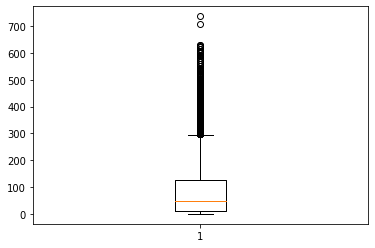

In [ ]:
plt.boxplot(data_cleaned['lead_time'])

You can see the upper part of the plot where there is some outliers, we can remove the outliers in different ways 

some ways are:

1. removing the rows by filtering 
2. normalization

In [ ]:
data_cleaned= data_cleaned.loc[data_cleaned["lead_time"]<300]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7845d551c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7845d55880>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7845d48e20>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7845d55f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7845d5d280>],
 'means': []}

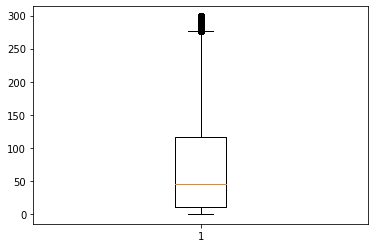

In [ ]:
plt.boxplot(data_cleaned['lead_time'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7845d2e370>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7845d2ea30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7845d21fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7845d3a130>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7845d3a430>],
 'means': []}

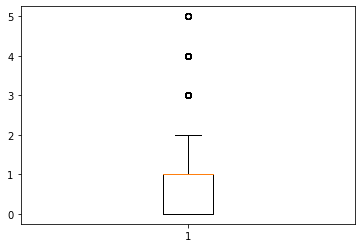

In [ ]:
plt.boxplot(data_cleaned['total_of_special_requests'])

In [ ]:
data_cleaned= data_cleaned.loc[data_cleaned['total_of_special_requests']<3]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7845c8b2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7845c8b970>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7845c7df10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7845d97040>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7845d97340>],
 'means': []}

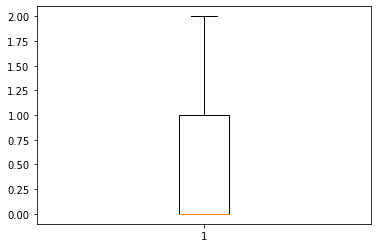

In [ ]:
plt.boxplot(data_cleaned['total_of_special_requests'])

**Removing the unnecessary columns**

In [ ]:
data_cleaned=data_cleaned.drop('distribution_channel',axis=1)

In [ ]:
data_cleaned_labels=data_cleaned['is_canceled']

In [ ]:
data_cleaned=data_cleaned.drop(data_cleaned.columns[1],axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_final,data_final_labels, test_size=0.30, random_state=1)

lgr=LogisticRegression()
lgr.fit(x_train,y_train)

pred_cleaned=lgr.predict(x_test)

accuracy_score_lgr=accuracy_score(pred_cleaned,y_test)

print(accuracy_score_lgr)

0.9019592777564349


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
